In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import plotly.express as px
import plotly.io as pio

In [101]:
stroke_dataset = pd.read_csv("healthcare-dataset-stroke-data.csv.csv")
print(stroke_dataset)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [102]:
#Understanding the Stroke dataset
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [103]:
stroke_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [104]:
stroke_dataset.head()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [105]:
stroke_dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [106]:
#Check if BMI still has null after replacing BMI null values with BMI mean
stroke_dataset['bmi'] = stroke_dataset['bmi'].fillna(stroke_dataset['bmi'].mean())
stroke_dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [110]:
stroke_dataset["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [108]:
stroke_dataset["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [109]:
stroke_dataset["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

/Users/ctn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

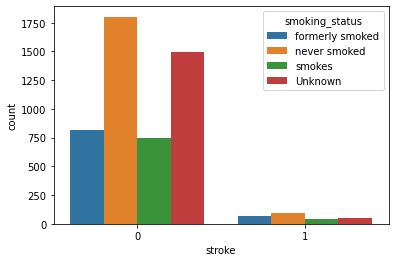

In [111]:
sns.countplot(stroke_dataset['stroke'], hue=stroke_dataset['smoking_status'])

<AxesSubplot:>

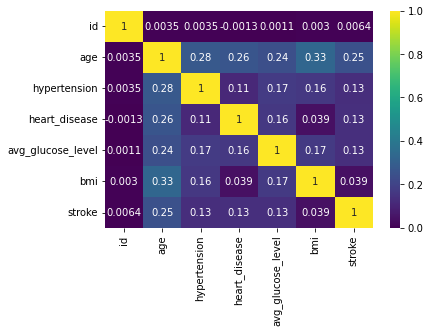

In [112]:
sns.heatmap(stroke_dataset.corr(), annot = True, cmap = 'viridis')

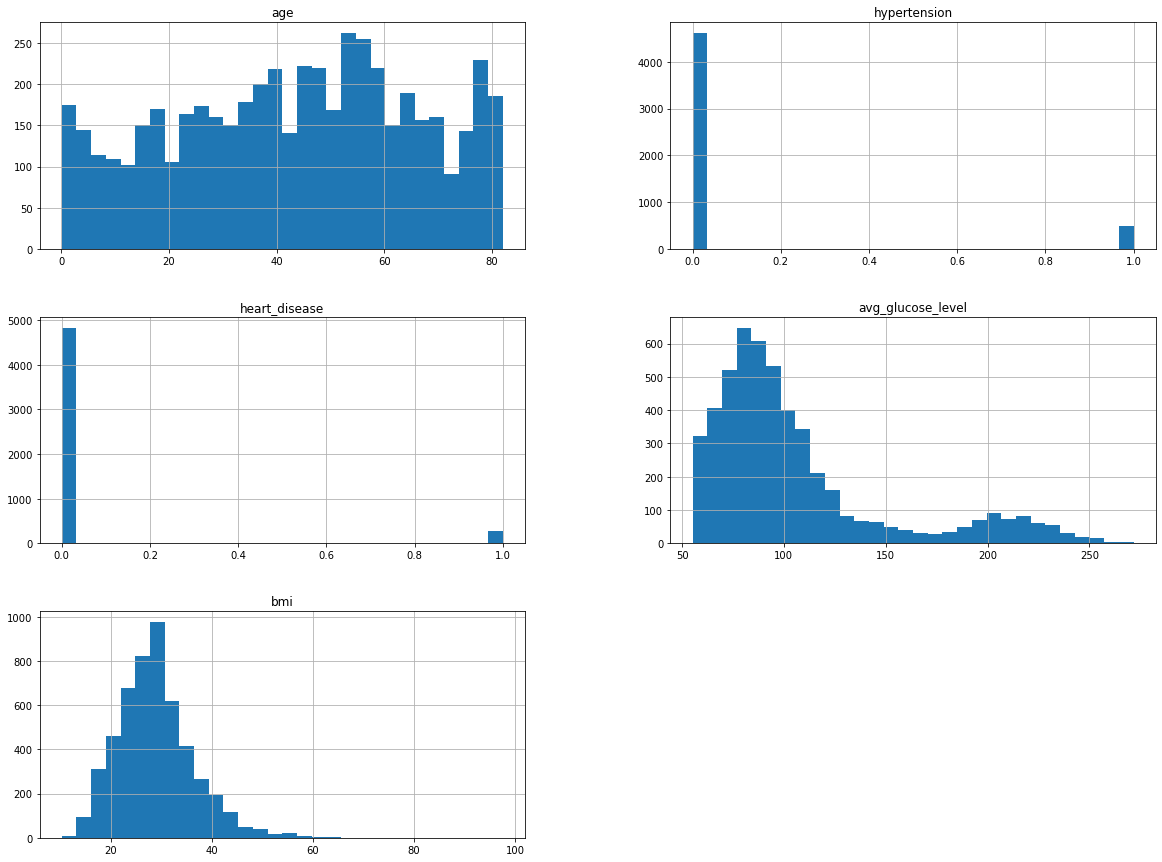

In [113]:
numerical=['age','hypertension','heart_disease','avg_glucose_level','bmi']
stroke_dataset[numerical].hist(bins=30,figsize=(20,15));

In [114]:
#Changing values to 1 and 0:
def change(col):
    if col == 'Male':
        return 0
    elif col =='Female':
        return 1
    else:
        return 2

stroke_dataset['gender'] = stroke_dataset['gender'].apply(change)

def alter(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

stroke_dataset['work_type'] = stroke_dataset['work_type'].apply(alter)

def change1(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else:
        return 3

stroke_dataset['smoking_status'] = stroke_dataset['smoking_status'].apply(change1)

In [115]:
#Dropping unnecessary columns
stroke_dataset.drop(['id', 'ever_married','Residence_type'], axis = 1, inplace=True)
stroke_dataset.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,228.69,36.600000,0,1
1,1,61.0,0,0,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,105.92,32.500000,1,1
3,1,49.0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,1,174.12,24.000000,1,1


In [119]:
#Training model utilizing sklearn
from sklearn.model_selection import train_test_split

In [120]:
X = stroke_dataset.iloc[:,:-1].values
print(X)
y = stroke_dataset.iloc[:,-1].values
print(y)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

[[  0.          67.           0.         ... 228.69        36.6
    0.        ]
 [  1.          61.           0.         ... 202.21        28.89323691
    1.        ]
 [  0.          80.           0.         ... 105.92        32.5
    1.        ]
 ...
 [  1.          35.           0.         ...  82.99        30.6
    1.        ]
 [  0.          51.           0.         ... 166.29        25.6
    0.        ]
 [  1.          44.           0.         ...  85.28        26.2
    3.        ]]
[1 1 1 ... 0 0 0]


In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [122]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962   0]
 [ 60   0]]


0.9412915851272016

In [124]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 95.38 %
Standard deviation: 0.07 %


In [125]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'kernel': ['rbf', 'sigmoid'],
          'degree': np.linspace(2, 5, 4),
          'C': np.logspace(-3, 5, 17),
          'gamma': np.logspace(-3, 5, 17)}
grid = RandomizedSearchCV(classifier, param_grid,cv=10, random_state = 0)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'degree': array([2., 3., 4., 5.]),
                                        'gamma': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=0)

In [126]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'sigmoid', 'gamma': 0.01, 'degree': 2.0, 'C': 0.01}
SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)


In [127]:
from sklearn.svm import SVC
classifier = SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962   0]
 [ 60   0]]


0.9412915851272016

In [129]:
print("Our Final Model accuracy is " + str(accuracy_score(y_test, y_pred)) + "%")

Our Final Model accuracy is 0.9412915851272016%
